# Titanic Data Set
#### by Ventrapragada Sai Rathan

#### Import Required Modules

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as logisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn.svm import SVC as SVM
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as SplitData
from sklearn.model_selection import GridSearchCV as Search
from sklearn.preprocessing import StandardScaler as ScaleData

#### Reading Dataset using pandas

In [2]:
data=pd.read_csv('.\Titanic_data_set.csv')
print(data.head(5))
print(data.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

### Data cleaning
    Removing useless columns and filling null values.

In [3]:
data=data.drop(columns=['Cabin','Name','PassengerId','Ticket'])
data['Age']=data['Age'].fillna(np.mean(data['Age']))
data['Ischild']=data['Age'].apply(lambda x:x<=16)
data=data.dropna()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
Ischild     889 non-null bool
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 63.4+ KB
None


### Data Comparision
    Various graphs to show how data are related.

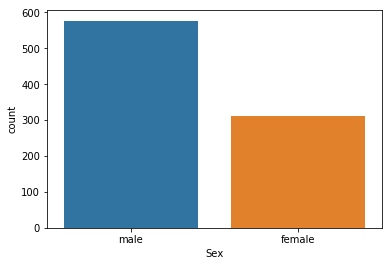

In [4]:
graph=sns.countplot(x='Sex',data=data)
plt.show(graph)

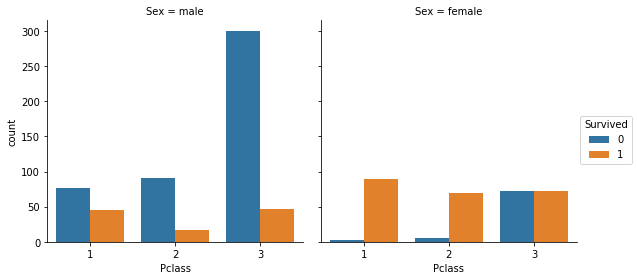

In [5]:
graph=sns.factorplot(x='Pclass',hue='Survived',col='Sex',data=data,kind='count')
plt.show(graph)

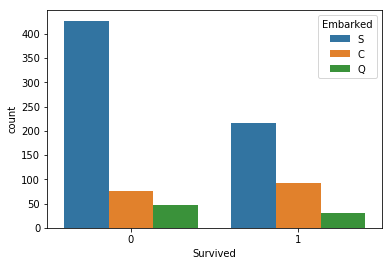

In [6]:
graph=sns.countplot(x='Survived',hue='Embarked',data=data)
plt.show(graph)

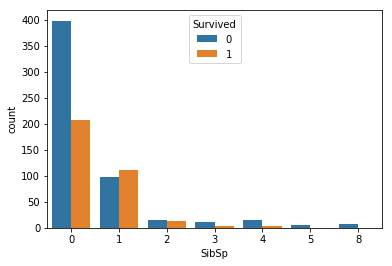

In [7]:
graph=sns.countplot(x='SibSp',hue='Survived',data=data)
plt.show(graph)

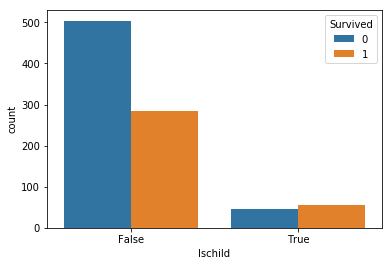

In [8]:
graph=sns.countplot(x='Ischild',hue='Survived',data=data)
plt.show(graph)

### Replacing text in columns with numericals
### Creating a column Ischild to know if the person is child or not


In [9]:
data['Sex'].replace(['male','female'],[1,0],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Ischild'].replace([True,False],[1,0],inplace=True)
print(data.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Ischild
0         0       3    1  22.0      1      0   7.2500         0        0
1         1       1    0  38.0      1      0  71.2833         1        0
2         1       3    0  26.0      0      0   7.9250         0        0
3         1       1    0  35.0      1      0  53.1000         0        0
4         0       3    1  35.0      0      0   8.0500         0        0


### Checking the Correlation between features to know which features or more important

In [10]:
print(data.corr(method='pearson'))

          Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.335549 -0.541585 -0.074673 -0.034040  0.083151   
Pclass   -0.335549  1.000000  0.127741 -0.327954  0.081656  0.016824   
Sex      -0.541585  0.127741  1.000000  0.089434 -0.116348 -0.247508   
Age      -0.074673 -0.327954  0.089434  1.000000 -0.231875 -0.178232   
SibSp    -0.034040  0.081656 -0.116348 -0.231875  1.000000  0.414542   
Parch     0.083151  0.016824 -0.247508 -0.178232  0.414542  1.000000   
Fare      0.255290 -0.548193 -0.179958  0.088604  0.160887  0.217532   
Embarked  0.108669  0.043835 -0.118593  0.009499 -0.060606 -0.079320   
Ischild   0.122737  0.127349 -0.103717 -0.594584  0.337527  0.334481   

              Fare  Embarked   Ischild  
Survived  0.255290  0.108669  0.122737  
Pclass   -0.548193  0.043835  0.127349  
Sex      -0.179958 -0.118593 -0.103717  
Age       0.088604  0.009499 -0.594584  
SibSp     0.160887 -0.060606  0.337527  
Parch     0.217532 -0.079320  0.3

### Segregating the Feature and Target data from original data and also normalising Data using Standard Scaler

In [11]:
Ydata=data['Survived']
Xdata=data.drop(columns=['Survived'])
scaler=ScaleData()
scaler=scaler.fit(Xdata)

### Splitting Data into Train and Test Data followed by Scaling of Data by Scaler obatined above

In [12]:
Xtrain,Xtest,Ytrain,Ytest=SplitData(Xdata,Ydata,test_size=0.3)

In [13]:
Xtrain=scaler.transform(Xtrain)
Xtest=scaler.transform(Xtest)

### Logistic Regression

In [14]:
cls1=logisticRegression()
cls1.fit(Xtrain,Ytrain)
print("Logistic Regression :")
print("Train Data:")
print("Accuracy = %f%%"%(100*accuracy_score(Ytrain,cls1.predict(Xtrain))))
print('Classification Report:')
print(classification_report(Ytrain,cls1.predict(Xtrain)))
print('Confusion Matrix:')
print(confusion_matrix(Ytrain,cls1.predict(Xtrain)))
print("")
print("Test Data:")
print("Accuracy = %f%%"%(100*accuracy_score(Ytest,cls1.predict(Xtest))))
print('Classification Report:')
print(classification_report(Ytest,cls1.predict(Xtest)))
print('Confusion Matrix:')
print(confusion_matrix(Ytest,cls1.predict(Xtest)))

Logistic Regression :
Train Data:
Accuracy = 79.742765%
Classification Report:
             precision    recall  f1-score   support

          0       0.81      0.87      0.84       383
          1       0.77      0.68      0.72       239

avg / total       0.80      0.80      0.79       622

Confusion Matrix:
[[333  50]
 [ 76 163]]

Test Data:
Accuracy = 79.026217%
Classification Report:
             precision    recall  f1-score   support

          0       0.82      0.84      0.83       166
          1       0.73      0.70      0.72       101

avg / total       0.79      0.79      0.79       267

Confusion Matrix:
[[140  26]
 [ 30  71]]


### K Nearest Neighbours where hyperparameter 'n_neighbors' is  searched using GridSearchCV 

In [15]:
cls2=KNN()
parameters={'n_neighbors':list(range(1,10))}
cls2=Search(cls2,parameters,scoring='accuracy',cv=5)
cls2.fit(Xtrain,Ytrain)
print("Best Hyper Parametrs:",cls2.best_params_)
print("K Nearest Neighbours :")
print("Train Data:")
print("Accuracy = %f%%"%(100*accuracy_score(Ytrain,cls2.predict(Xtrain))))
print('Classification Report:')
print(classification_report(Ytrain,cls2.predict(Xtrain)))
print('Confusion Matrix:')
print(confusion_matrix(Ytrain,cls2.predict(Xtrain)))
print("")
print("Test Data:")
print("Accuracy = %f%%"%(100*accuracy_score(Ytest,cls2.predict(Xtest))))
print('Classification Report:')
print(classification_report(Ytest,cls2.predict(Xtest)))
print('Confusion Matrix:')
print(confusion_matrix(Ytest,cls2.predict(Xtest)))

Best Hyper Parametrs: {'n_neighbors': 6}
K Nearest Neighbours :
Train Data:
Accuracy = 85.369775%
Classification Report:
             precision    recall  f1-score   support

          0       0.85      0.93      0.89       383
          1       0.87      0.73      0.79       239

avg / total       0.86      0.85      0.85       622

Confusion Matrix:
[[357  26]
 [ 65 174]]

Test Data:
Accuracy = 79.026217%
Classification Report:
             precision    recall  f1-score   support

          0       0.80      0.89      0.84       166
          1       0.78      0.62      0.69       101

avg / total       0.79      0.79      0.78       267

Confusion Matrix:
[[148  18]
 [ 38  63]]


### Support Vector Machines using RBF Kernel

In [16]:
cls3=SVM()
cls3.fit(Xtrain,Ytrain)
print("SVM :")
print("Train Data:")
print("Accuracy = %f%%"%(100*accuracy_score(Ytrain,cls3.predict(Xtrain))))
print('Classification Report:')
print(classification_report(Ytrain,cls3.predict(Xtrain)))
print('Confusion Matrix:')
print(confusion_matrix(Ytrain,cls3.predict(Xtrain)))
print("")
print("Test Data:")
print("Accuracy = %f%%"%(100*accuracy_score(Ytest,cls3.predict(Xtest))))
print('Classification Report:')
print(classification_report(Ytest,cls3.predict(Xtest)))
print('Confusion Matrix:')
print(confusion_matrix(Ytest,cls3.predict(Xtest)))

SVM :
Train Data:
Accuracy = 84.565916%
Classification Report:
             precision    recall  f1-score   support

          0       0.83      0.95      0.88       383
          1       0.89      0.68      0.77       239

avg / total       0.85      0.85      0.84       622

Confusion Matrix:
[[363  20]
 [ 76 163]]

Test Data:
Accuracy = 83.146067%
Classification Report:
             precision    recall  f1-score   support

          0       0.82      0.94      0.87       166
          1       0.87      0.65      0.75       101

avg / total       0.84      0.83      0.83       267

Confusion Matrix:
[[156  10]
 [ 35  66]]


### Decision Tree Classifier where Hyperparameters 'max_depth', 'min_samples_leaf' and 'max_features' are searched using GridSearchCV 

In [17]:
cls4=DecisionTree()
parameters={'max_depth':list(range(5,20)),'min_samples_leaf':list(range(1,15)),'max_features':list(range(1,9))}
cls4=Search(cls4,parameters,scoring='accuracy',cv=2)
cls4.fit(Xtrain,Ytrain)
print("Best Hyper Parameters from Grid Search Cv are :",cls4.best_params_)
print("Decision Tree :")
print("Train Data:")
print("Accuracy = %f%%"%(100*accuracy_score(Ytrain,cls4.predict(Xtrain))))
print('Classification Report:')
print(classification_report(Ytrain,cls4.predict(Xtrain)))
print('Confusion Matrix:')
print(confusion_matrix(Ytrain,cls4.predict(Xtrain)))
print("")
print("Test Data:")
print("Accuracy = %f%%"%(100*accuracy_score(Ytest,cls4.predict(Xtest))))
print('Classification Report:')
print(classification_report(Ytest,cls4.predict(Xtest)))
print('Confusion Matrix:')
print(confusion_matrix(Ytest,cls4.predict(Xtest)))

Best Hyper Parameters from Grid Search Cv are : {'max_depth': 7, 'max_features': 3, 'min_samples_leaf': 2}
Decision Tree :
Train Data:
Accuracy = 85.852090%
Classification Report:
             precision    recall  f1-score   support

          0       0.84      0.95      0.89       383
          1       0.89      0.72      0.80       239

avg / total       0.86      0.86      0.85       622

Confusion Matrix:
[[362  21]
 [ 67 172]]

Test Data:
Accuracy = 79.026217%
Classification Report:
             precision    recall  f1-score   support

          0       0.79      0.91      0.84       166
          1       0.80      0.59      0.68       101

avg / total       0.79      0.79      0.78       267

Confusion Matrix:
[[151  15]
 [ 41  60]]
